<a href="https://colab.research.google.com/github/leedy40259/Ybigta_DA/blob/main/EDA_%EA%B3%BC%EC%A0%9C_%EC%9D%B4%EB%8B%A4%EC%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
user_spec = pd.read_csv('/content/drive/MyDrive/2022F 빅콘테스트/Data/user_spec.csv', encoding = 'utf8')

* 분석 목표
  * 데이터를 통해서 분석하고자 하는 목표
  1. credit score, yearly income 분포 살펴보기
  2. 가장 결측치가 많은 personal rehabilitation yn 결측치 채우기

## User_spec

In [5]:
user_spec

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,202106.0,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,NaN,NaN
1394212,1327066,151422,1955.0,1.0,2022-03-22 01:19:24,980.0,20000000.0,OTHERINCOME,NaN,기타,자가,50000000.0,생활비,NaN,NaN,1.0,NaN
1394213,1319606,173524,1983.0,1.0,2022-03-22 07:34:32,750.0,75000000.0,EARNEDINCOME,200908.0,정규직,자가,100000000.0,대환대출,NaN,NaN,8.0,200000000.0
1394214,1482466,766546,1975.0,1.0,2022-03-22 22:12:35,640.0,50000000.0,EARNEDINCOME,201705.0,정규직,자가,10000000.0,대환대출,NaN,NaN,10.0,117000000.0


In [6]:
# null값 개수 확인
pd.set_option('display.max_rows', None)
user_spec.isnull().sum()

application_id                               0
user_id                                      0
birth_year                               12961
gender                                   12961
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
dtype: int64

In [7]:
pd.set_option('display.max_rows', 10)

### credit score

In [8]:
# credit score 이상치 확인하기
credit_score = user_spec['credit_score']
credit_score

0          660.0
1          870.0
2          710.0
3          820.0
4          630.0
           ...  
1394211    590.0
1394212    980.0
1394213    750.0
1394214    640.0
1394215      NaN
Name: credit_score, Length: 1394216, dtype: float64

In [9]:
credit_score.describe()

count    1.289101e+06
mean     6.384447e+02
std      1.249724e+02
min      6.000000e+01
25%      5.700000e+02
50%      6.200000e+02
75%      6.900000e+02
max      1.000000e+03
Name: credit_score, dtype: float64

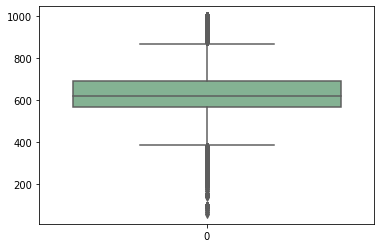

In [10]:
sns.set_palette("crest")
sns.boxplot(data=credit_score)

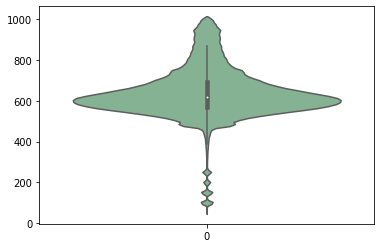

In [11]:
sns.violinplot(data = credit_score) #violin plot

* 신용등급별 의미
* 데이터는 600점대에 신용점수가 몰려 있음
* 600점대는 6-7등급으로 주의-일반군 사이에 속함 [링크](https://story.alda.ai/?p=1233://)
* 일반적으로 1금융권 대출은 5등급까지만 가능 (700점대)
* 일반적으로 6등급 미만의 고객에게는 신용카드 발급 시 매우 까다로운 기준을 적용

신용도 분포
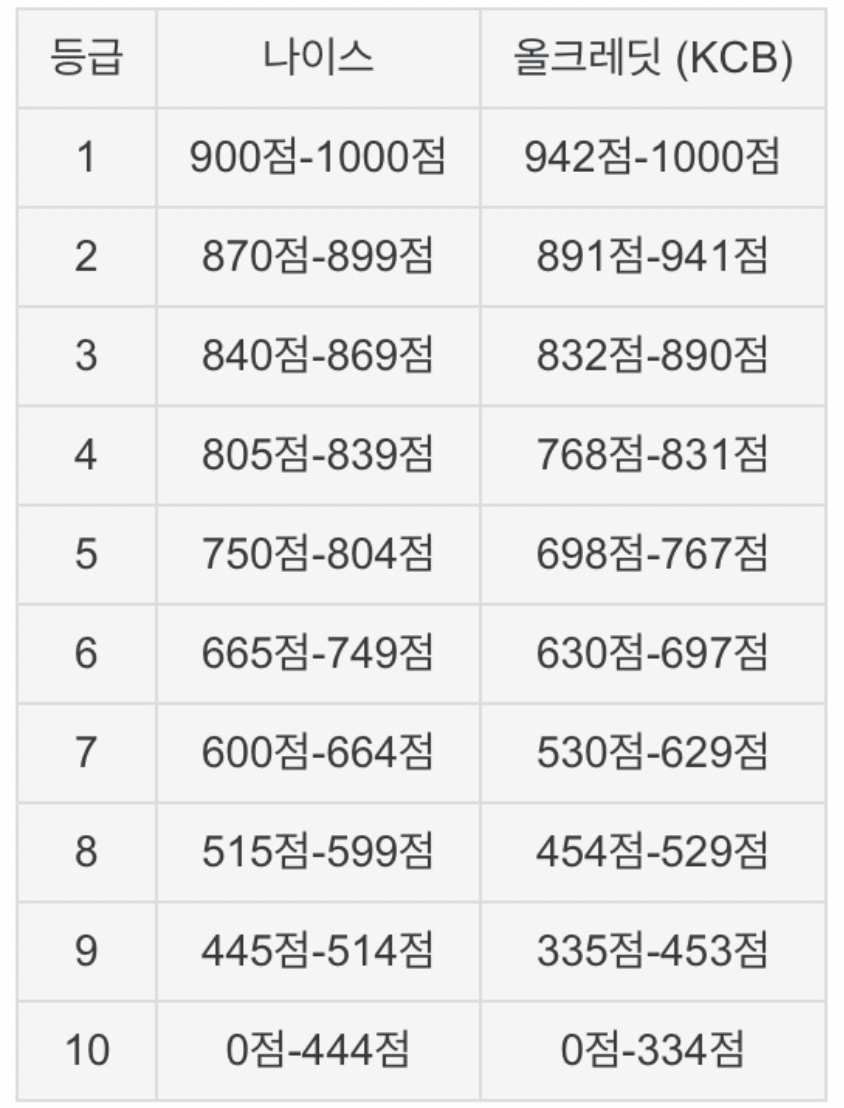

### yearly income

In [12]:
# yearly income 이상치 확인하기
yearly_income = user_spec['yearly_income'].round(5) # scientific notation to decimal
yearly_income.describe()
# 평균 4300만원
# 중간값 3400만원

count    1.394126e+06
mean     4.345326e+07
std      1.208401e+08
min      0.000000e+00
25%      2.500000e+07
50%      3.400000e+07
75%      4.800000e+07
max      1.000000e+10
Name: yearly_income, dtype: float64

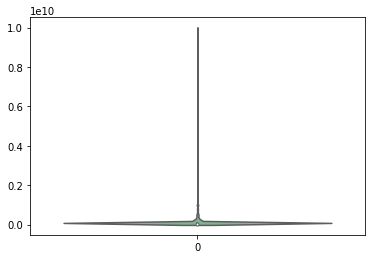

In [13]:
sns.violinplot(data = yearly_income)
sns.set(rc={'figure.figsize':(10, 10)})

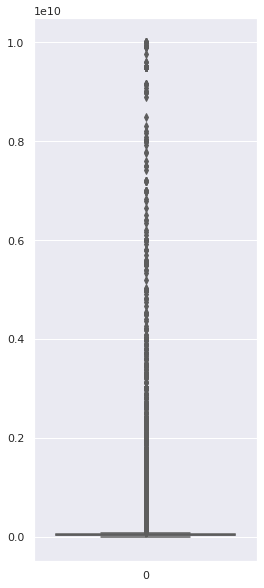

In [14]:
plt.figure(figsize=(4,10))
sns.set_palette("crest") 
sns.boxplot(data=yearly_income) 

In [15]:
print(yearly_income[yearly_income > 1e+5].value_counts().sum()) # 10만원(100,000)
print(yearly_income[yearly_income > 1e+6].value_counts().sum()) # 100만원(1,000,000)
print(yearly_income[yearly_income > 1e+7].value_counts().sum()) # 1000만원(10,000,000)
print(yearly_income[yearly_income > 1e+8].value_counts().sum()) # 1억(100,000,000)
print(yearly_income[yearly_income > 1e+9].value_counts().sum()) # 10억(1,000,000,000)
print(yearly_income[yearly_income >= 1e+10].value_counts().sum()) # 100억(10,000,000,000)
# 전체 데이터 개수: 1394216

1376667
1367622
1303852
37647
961
9


In [16]:
# income이 0인 사람들의 비율 -> 17459개로 전체의 1%
yearly_income[yearly_income == 0].count()

17459

### personal rehabilitation

In [17]:
personal_rehabilitation_yn = user_spec['personal_rehabilitation_yn']

In [18]:
print(personal_rehabilitation_yn.value_counts())
print(personal_rehabilitation_yn.isnull().sum())
# 전체 데이터 개수: 1394216

0.0    794046
1.0     12709
Name: personal_rehabilitation_yn, dtype: int64
587461


In [19]:
# 개인회생자 여부에 따른 신용등급 분표
user_spec.groupby(['personal_rehabilitation_yn'])['credit_score'].mean()

personal_rehabilitation_yn
0.0    642.160520
1.0    449.203704
Name: credit_score, dtype: float64

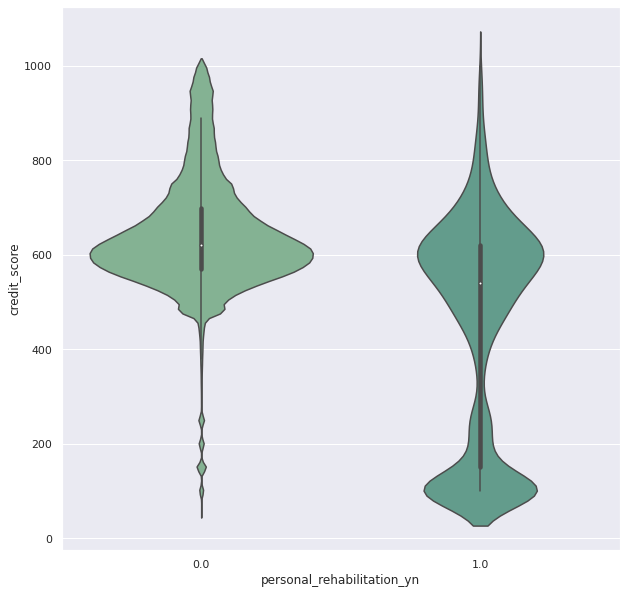

In [20]:
# 개인회생자 여부에 따른 신용등급 분표
sns.violinplot(x = "personal_rehabilitation_yn", y = 'credit_score', data = user_spec)

* 개인회생을 신청하지 않은 사람이 더 많다 보니 개인회생을 하지 않은 사람들의 바이올린plot은 전체 violinplot과 비슷
* 개인회생자는 무조건 신용등급이 낮을 줄 알았는데 생각보다 그렇지는 않음

* null값은 어플 사용 결과 개인회생을 하지 않은 것이므로 null -> 0으로 전처리

In [21]:
rehab_cp_null = user_spec[user_spec['personal_rehabilitation_yn'].isnull()].index
user_spec.loc[rehab_cp_null, 'personal_rehabilitation_yn'] = 0

In [22]:
user_spec.personal_rehabilitation_yn.isnull().sum()

0